<a href="https://colab.research.google.com/github/guilhermelaviola/ApplicationsOfDataScienceInDisruptiveTechnologies/blob/main/Class05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kernel Correlation Filters (KCF)**
The Kernelized Correlation Filters (KCF) algorithm offers an effective solution for real-time object tracking in videos, leveraging correlation filters, the "Kernel Trick," and Fast Fourier Transform (FFT). This combination addresses challenges like partial occlusions and lighting variations while enhancing processing speed, making it suitable for devices with limited computing power. Key to its performance is the accurate definition of the Region of Interest (ROI) and the selection of kernels, typically the Radial Basis Function (RBF). Compared to other algorithms like CSRT and Median Flow, KCF balances accuracy and speed, with CSRT being more accurate at higher computational costs. To enhance KCF's performance, techniques such as dynamic ROI updating, preprocessing to reduce noise, and combining it with other trackers can be employed. Optimal configuration parameters and suitable implementation platforms, such as Google Colab, further contribute to its efficacy, establishing KCF as a powerful tool for diverse tracking applications.

## **KCF Example**

In [1]:
# Installing OpenCV with contrib modules (required for the KCF tracker and other trackers):
!pip install opencv-python opencv-contrib-python

In [2]:
# Importing all the necessary libraries:
import cv2
import time
from google.colab import files
from google.colab.patches import cv2_imshow

In [3]:
# Uploading the video:
uploaded = files.upload()

# Checking if the file was uploaded:
if len(uploaded) > 0:
    video_path = list(uploaded.keys())[0]  # Getting the title of the uploaded file
else:
    print('Error. The video was not uploaded.')

# Opening the video:
cap = cv2.VideoCapture(video_path)

# Checking if the video was opened correctly:
if not cap.isOpened():
    print('Error opening the video.')
else:
    # Reading the first frame of the video:
    ret, frame = cap.read()

    if not ret:
        print('Error reading the first frame of the video.')
    else:
        # Manually defining the ROI (bounding box)
        # Trying to adjust the coordinates (x, y, width, height) accordingly.
        bbox = (80, 60, 150, 150)  # Adjusting for the object of the first frame accordingly.

        # Initializing the KCF tracker:
        tracker = cv2.legacy.TrackerKCF_create() # Accessing KCF from the legacy module
        tracker.init(frame, bbox)

        # Loop to track the object in the following frames:
        while True:
            ret, frame = cap.read()

            if not ret:
                print('The video ended or there was an error reading the frame.')
                break

            # Updating the position of the tracked object:
            ret, bbox = tracker.update(frame)

            if ret:
                # Drawing a bounding box around the tracked object:
                p1 = (int(bbox[0]), int(bbox[1]))
                p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
                cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
            else:
                # If tracking fails:
                cv2.putText(frame, 'Failed', (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

            # Displaying the frame with the tracked object:
            # cv2_imshow(frame) # Removed the call to cv2_imshow

        # Releasing the video at the end of processing:
        cap.release()
        cv2.destroyAllWindows()

Saving hudson-hornet.mp4 to hudson-hornet.mp4
The video ended or there was an error reading the frame.


## **Comparing of KCF with Other Algorithms**

Saving hudson-hornet.mp4 to hudson-hornet (1).mp4
KCF execution time: 0.0061 seconds
Displaying the first frame with KCF...


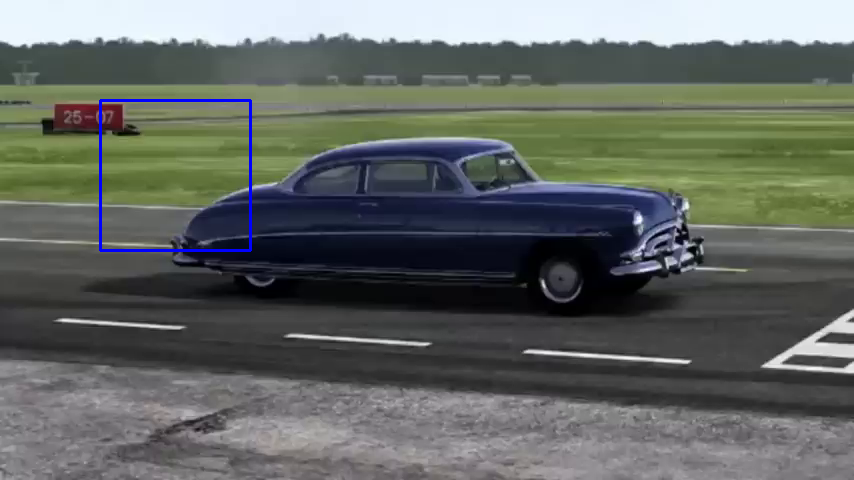

KCF execution time: 0.0592 seconds
Displaying the first frame with CSRT...


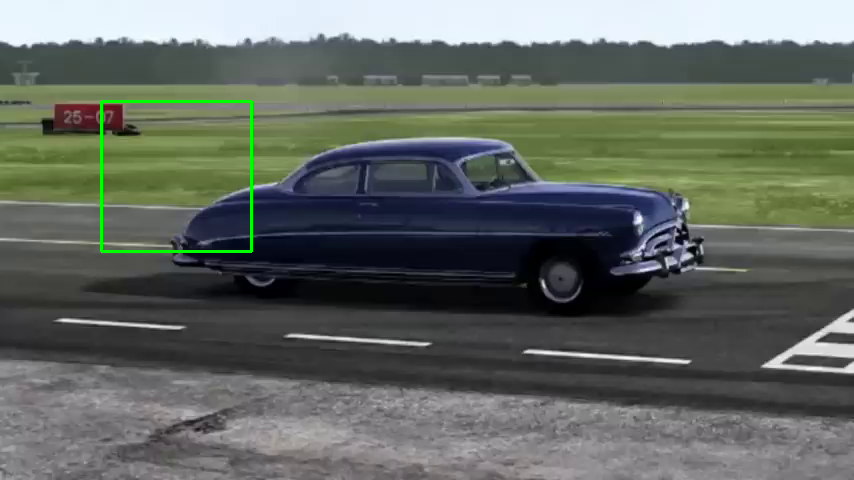

In [4]:
# Uploading the video:
uploaded = files.upload()

# Checking if the file was loaded:
if len(uploaded) > 0:
    video_path = list(uploaded.keys())[0]  # Getting the name of the uploaded file.
else:
    print('Error. The video was not uploaded.')

# Opening the video:
cap = cv2.VideoCapture(video_path)

# Checking if the video was opened correctly:
if not cap.isOpened():
    print('Error opening the video.')
else:
    # Reading the first frame of the video:
    ret, frame = cap.read()

    if not ret:
        print('Error opening the first frame of the video.')
    else:
         # Manually defining the ROI (bounding box)
        # Trying to adjust the coordinates (x, y, width, height) accordingly.
        bbox = (100, 100, 150, 150)  # Adjusting for the object of the first frame accordingly.

        # Tracking with KCF:
        tracker_kcf = cv2.TrackerKCF_create()
        tracker_kcf.init(frame, bbox)

        # Measuring the time of KCF:
        start_kcf = time.time()
        ret_kcf, bbox_kcf = tracker_kcf.update(frame)
        end_kcf = time.time()

        # Drawing a bounding box around the object tracked by KCF:
        if ret_kcf:
            p1_kcf = (int(bbox_kcf[0]), int(bbox_kcf[1]))
            p2_kcf = (int(bbox_kcf[0] + bbox_kcf[2]), int(bbox_kcf[1] + bbox_kcf[3]))
            cv2.rectangle(frame, p1_kcf, p2_kcf, (255, 0, 0), 2, 1)
            print(f'KCF execution time: {end_kcf - start_kcf:.4f} seconds')
            print('Displaying the first frame with KCF...')
            cv2_imshow(frame)
        else:
            print('Error on KCF tracking...')

        # Reading the first frame again, now for CSRT:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret, frame = cap.read()

        # Tracking with CSRT:
        tracker_csrt = cv2.TrackerCSRT_create()
        tracker_csrt.init(frame, bbox)

        # Measuring time with CSRT:
        start_csrt = time.time()
        ret_csrt, bbox_csrt = tracker_csrt.update(frame)
        end_csrt = time.time()

        # Drawing a bounding box around the object tracked by CSRT:
        if ret_csrt:
            p1_csrt = (int(bbox_csrt[0]), int(bbox_csrt[1]))
            p2_csrt = (int(bbox_csrt[0] + bbox_csrt[2]), int(bbox_csrt[1] + bbox_csrt[3]))
            cv2.rectangle(frame, p1_csrt, p2_csrt, (0, 255, 0), 2, 1)
            print(f'KCF execution time: {end_csrt - start_csrt:.4f} seconds')
            print('Displaying the first frame with CSRT...')
            cv2_imshow(frame)
        else:
            print('Error CSRT tracking.')

        # Releasing the video after the processing:
        cap.release()
        cv2.destroyAllWindows()